# Facemask Classifier

This notebook serves as a basic showcase of this project and the results we achieved.

> **Note:** we assume that at this point you have already set up a virtual environment as outlined in the [README](./README.md) and that all necessary dependencies are installed.

First things first, get imports and setup out of the way.

In [1]:
import torch
import sys
import os
import random
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
import numpy as np

In [2]:
# for the sake of consistency and reproducability in this demo, we set a fixed seed. But feel free to play around or omit this part.
seed=1337
torch.manual_seed(seed)
random.seed(seed)

Let's download the evaluation dataset. Note, the model was **not** trained on these images, although they stem from the same dataset. The entire original dataset stems from kaggle, and is only mirrored on google drive for the sake of convenience. The original dataset can be found [here](https://www.kaggle.com/datasets/pranavsingaraju/facemask-detection-dataset-20000-images).

In [3]:
from scripts.download_dataset import download_dataset
url='https://drive.google.com/uc?id=1XFsArFfXUTJ3Mn7yTzefrvced957agJq'
dataset_path='dataset'
# download_dataset(url, out_path=dataset_path)

Now for the pre-trained model.

In [4]:
from scripts.download_model import download_model
url='https://drive.google.com/uc?id=1i_GS0o_2evh_K8Iivt0S-i089sE7P_ud'
model_path='demo-model.pt'
# download_model(url, out_path=model_path)

Let's choose a small subsample of images from the dataset and run our model against it.

In [5]:
from architecture import Model1
from torchvision import transforms
from torch.utils.data import DataLoader, random_split, Subset
from torchvision.datasets import ImageFolder

model = Model1()
model.load_state_dict(torch.load(model_path))
model.eval()

# collect data for displaying later
eval_results=[]

dataset = ImageFolder(
        root=dataset_path,
        transform=transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.Resize((256, 256), antialias=True),
            ]
        ),
)

# try to use a perfect square, makes plotting calculations nicer :)
num_samples=16
test_set = Subset(dataset, random.sample(range(0, len(dataset)-1), num_samples))
test_loader = DataLoader(test_set, shuffle=True)

def get_class(idx):
    return test_set.dataset.classes[idx]

num_correct = 0
for data, label in test_loader:
    actual = label.item()
    prediction = 1 if torch.sigmoid(model(data)).item() > 0.5 else 0
    print(
        f"Actual: {actual} ({get_class(actual)}), Prediction: {prediction} ({get_class(prediction)})"
    )
    eval_results.append( (data.squeeze(), prediction, actual) )
    if actual == prediction:
        num_correct += 1
print(f"Accuracy: {num_correct/num_samples}")

Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 0 (new_with_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 0 (new_with_mask), Prediction: 0 (new_with_mask)
Actual: 0 (new_with_mask), Prediction: 0 (new_with_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 0 (new_with_mask), Prediction: 0 (new_with_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Actual: 0 (new_with_mask), Prediction: 0 (new_with_mask)
Actual: 1 (new_without_mask), Prediction: 1 (new_without_mask)
Accuracy: 0.9375


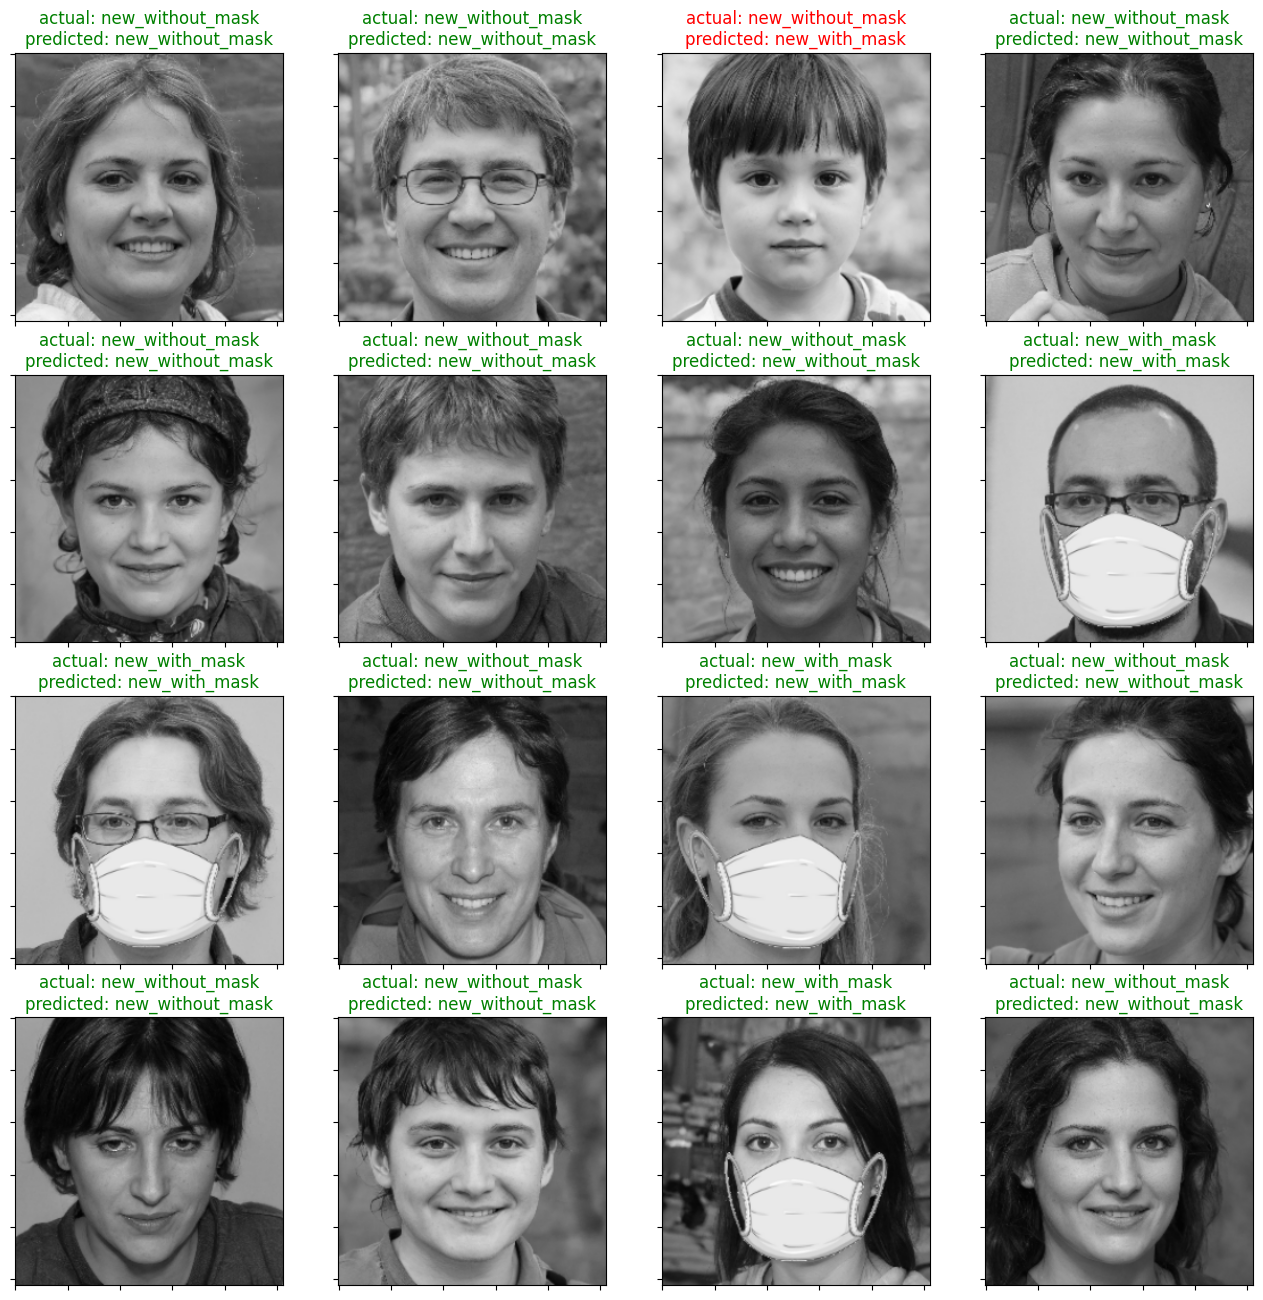

In [6]:
plt_samples=[test_set.dataset.imgs[x] for x in test_set.indices]
axis = int(np.ceil(np.sqrt(num_samples)))
fig, ax = plt.subplots(axis, axis, figsize = (16, 16))
i = 0
for row in range(axis):
     ax_row = ax[row]
     for column in range(axis):
         ax_column = ax_row[column]
         ax_column.set_xticklabels([])
         ax_column.set_yticklabels([])
         img = to_pil_image(eval_results[i][0])
         ax_column.imshow(img, cmap='gray')
         actual = eval_results[i][2]
         predicted = eval_results[i][1]
         is_correct = actual == predicted
         col = 'blue'
         ax_column.set_title(f"actual: {get_class(actual)}\npredicted: {get_class(predicted)}",
                    color = 'green' if is_correct else 'red')
         i += 1